<a href="https://colab.research.google.com/github/aleks-haksly/cs-club/blob/main/%D0%92%D0%B2%D0%B5%D0%B4%D0%B5%D0%BD%D0%B8%D0%B5%20%D0%B2%20%D0%BC%D0%B0%D1%82%D0%B5%D0%BC%D0%B0%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D1%83%D1%8E%20%D1%81%D1%82%D0%B0%D1%82%D0%B8%D1%81%D1%82%D0%B8%D0%BA%D1%83/Problems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Введение в математическую статистику, осень 2021, CS клуб #

## Модуль scipy.stats ##
https://stepik.org/course/107204/syllabus

### Problem 1 ###
image.png

In [1]:
import scipy.stats as ss
print(ss.norm(3, 4).ppf(0.95))

9.57941450780589


### Problem 2 ###
Найдите стандартное отклонение распределения Пуассона с параметром
μ=3. Округлите его до третьего знака после запятой.

In [ ]:
print(ss.poisson(3).std())

1.7320508075688772


### Problem 3 ###
Сгенерируйте 10 независимых реализаций из экспоненциального распределения
Exp(5) с random_state=1337 и найдите их сумму. Округлите ответ до третьего знака после запятой.

In [2]:
print(ss.expon(scale=1/5).rvs(size=10, random_state=1337).sum())

1.6029013627391047


### Problem 5 ###
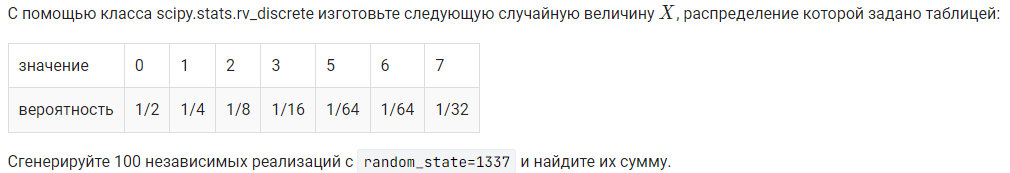

In [3]:
dist = ss.rv_discrete(values=([0, 1, 2, 3, 5, 6, 7], [1/2, 1/4, 1/8, 1/16, 1/64, 1/64, 1/32]))
print(dist.rvs(size=100, random_state=1337).sum())

117


## Модуль scipy.optimize ##

### Prooblem 1 ###
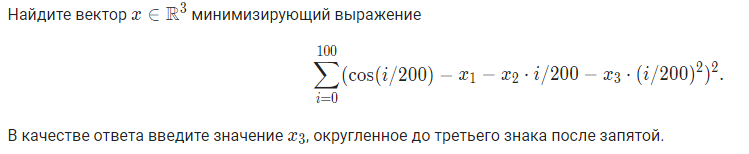

In [6]:
import numpy as np
from scipy.optimize import minimize

def fun(x):
    y = np.arange(101) / 200
    return np.sum((np.cos(y) - x[0] - x[1] * y - x[2] * y ** 2) ** 2)

res = minimize(fun, x0=[0, 0, 0])
print(res.x[2])

-0.48225533457727837


## Оценка характеристик случайных величин ##

### Problem 1 ###
Чему равна медиана экспоненциального распределения
Exp(1)? Сгенерируйте выборку объема
n (выберите самостоятельно) с помощью метода scipy.stats.expon.rvs(size=n) и посчитайте выборочную медиану с помощью метода numpy.median.
Точность: 0.005

In [9]:
import numpy as np
import scipy.stats as ss
print(np.median(ss.expon.rvs(size=100000)))

0.6940576138465432


### Problem 2 ###
Чему равен межквартильный размах
IQR 0.75 - 0.25 распределения Стьюдента с 3 степенями свободы, с матожиданием 3 и дисперсией 9? Сгенерируйте выборку объема  n (выберите
n самостоятельно) с помощью метода scipy.stats.t(df=3, loc=3, scale=3).rvs(size=n) и посчитайте нужные выборочные квантили с помощью метода numpy.quantile.

In [8]:
import numpy as np
import scipy.stats as ss
l, r = np.quantile(ss.t(3, 3, 3).rvs(size=1000000), [0.25, 0.75])
print(r - l)

4.595948114386754


### Problem 3 ###
Рассмотрим случайную величину, которая является смесью двух распределений: с вероятностью 0.95 ее реализация получается из распределения

N(μ=0,σ
2
 =1), а с вероятностью 0.05 — из распределения

N(3,9). Оцените ее стандартное отклонение (корень из дисперсии) с помощью метода numpy.std (или просто вызвав метод std у выборки, если она является numpy-массивом).

Для генерации выборки объема
n из такого распределения удобнее всего вначале сгенерировать выборку объема
n из распределения Бернулли
B(0.95): единицы этой выборки будут соответствовать реализациям
N(0,1), а нули — реализациям
N(3,9). Дальше нужно отдельно сгенерировать выборку для единиц, отдельно для нулей, и объединить их в одну выборку (в соответствии с выборкой из нулей и единиц).

Точность: 0.01

В жизни мы сталкиваемся со смесями распределений очень часто: допустим, по дороге на работу мы можем с какой-то вероятностью сесть в автобус, с какой-то — в маршрутку, а с какой-то — вызвать такси. Время, потраченное на дорогу, в этом случае — это смесь трех распределений: времени поездки на автобусе, времени поездки на маршрутке и времени поездки на такси.

In [10]:
import numpy as np
import scipy.stats as ss

N = 1000000
b = ss.bernoulli(0.95).rvs(size=N)
sample = b * ss.norm.rvs(size=N) + (1 - b) * ss.norm(3, 3).rvs(size=N)
print(sample.std())

1.3525669702541583


### Problem 4 ###
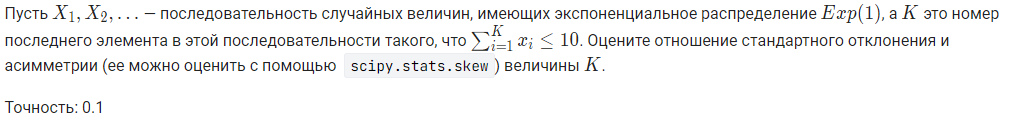

In [11]:
import scipy
import numpy as np
l = []
for i in range(10000):
    summ = 0
    k = 0
    while summ <= 10:
        k += 1
        summ += scipy.stats.expon(scale=1).rvs()
    l.append(k)
print(np.std(l)/scipy.stats.skew(l))

10.339829439022909


### Problem 5 ##
Честную игральную кость бросают 6 раз. С какой вероятностью сумма выпавших чисел будет равна 21?

Точность: 0.001

In [12]:
print(np.mean([1 if sum(np.random.choice(list(range(1, 7)), 6, replace=True)) == 21 else 0 for _ in range(10000)]))

0.0956


## Модели ##

## Problem 1 ##
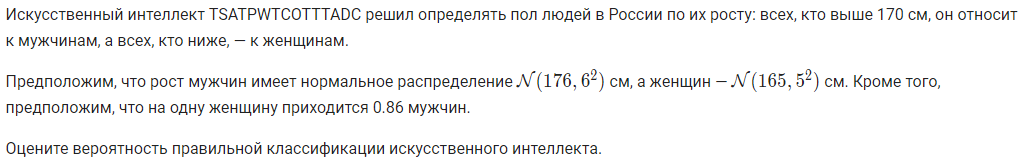

In [14]:
p_male_correct = scipy.stats.norm(loc=176, scale=6).sf(170)
p_female_correct =  scipy.stats.norm(loc=165, scale=5).cdf(170)
print(p_male_correct, p_female_correct)

#Т.к. вероятность правильно классифицировать male и female одинаковы (p_male_correct  =p_female_correct), то, насколько я понимаю, дисбалланс классов 0.86 ни на что не влияет...

0.8413447460685429 0.8413447460685429


### Problem 2 ###
Оцените средний выигрыш этого игрового автомата: <br>
https://stepik.org/lesson/633279/step/3?unit=629518


In [15]:
from fractions import Fraction as f

c = {(0, 0, 0): 0,
 (0, 0, 1): 0,
 (0, 0, 2): 0,
 (0, 0, 3): 0,
 (0, 0, 5): 0,
 (0, 0, 6): 2,
 (0, 0, 7): 0,
 (0, 1, 1): 0,
 (0, 1, 2): 0,
 (0, 1, 3): 0,
 (0, 1, 5): 0,
 (0, 1, 6): 2,
 (0, 1, 7): 0,
 (0, 2, 2): 0,
 (0, 2, 3): 0,
 (0, 2, 5): 0,
 (0, 2, 6): 2,
 (0, 2, 7): 0,
 (0, 3, 3): 0,
 (0, 3, 5): 0,
 (0, 3, 6): 2,
 (0, 3, 7): 0,
 (0, 5, 5): 0,
 (0, 5, 6): 10,
 (0, 5, 7): 0,
 (0, 6, 6): 5,
 (0, 6, 7): 2,
 (0, 7, 7): 0,
 (1, 1, 1): 10,
 (1, 1, 2): 5,
 (1, 1, 3): 5,
 (1, 1, 5): 20,
 (1, 1, 6): 2,
 (1, 1, 7): 0,
 (1, 2, 2): 5,
 (1, 2, 3): 5,
 (1, 2, 5): 10,
 (1, 2, 6): 2,
 (1, 2, 7): 0,
 (1, 3, 3): 5,
 (1, 3, 5): 10,
 (1, 3, 6): 2,
 (1, 3, 7): 0,
 (1, 5, 5): 40,
 (1, 5, 6): 10,
 (1, 5, 7): 0,
 (1, 6, 6): 5,
 (1, 6, 7): 2,
 (1, 7, 7): 0,
 (2, 2, 2): 25,
 (2, 2, 3): 5,
 (2, 2, 5): 50,
 (2, 2, 6): 2,
 (2, 2, 7): 0,
 (2, 3, 3): 5,
 (2, 3, 5): 10,
 (2, 3, 6): 2,
 (2, 3, 7): 0,
 (2, 5, 5): 100,
 (2, 5, 6): 10,
 (2, 5, 7): 0,
 (2, 6, 6): 5,
 (2, 6, 7): 2,
 (2, 7, 7): 0,
 (3, 3, 3): 40,
 (3, 3, 5): 80,
 (3, 3, 6): 2,
 (3, 3, 7): 0,
 (3, 5, 5): 160,
 (3, 5, 6): 10,
 (3, 5, 7): 0,
 (3, 6, 6): 5,
 (3, 6, 7): 2,
 (3, 7, 7): 0,
 (5, 5, 5): 1000,
 (5, 5, 6): 40,
 (5, 5, 7): 320,
 (5, 6, 6): 20,
 (5, 6, 7): 10,
 (5, 7, 7): 160,
 (6, 6, 6): 10,
 (6, 6, 7): 5,
 (6, 7, 7): 2,
 (7, 7, 7): 80}

p = {0: f(1, 2), 1: f(1, 4), 2: f(1, 8), 3: f(1, 16), 5: f(1, 64), 6: f(1, 64), 7: f(1, 32)}

l = []
for k, v in c.items():
    match len(set(k)):
        case 3: j = 6
        case 2: j = 3
        case 1: j = 1
    l.append(p[k[0]]*p[k[1]]*p[k[2]]*j*v)

print(float(sum(l)) // 0.02 * 0.02)

0.84


### Problem 3 ###
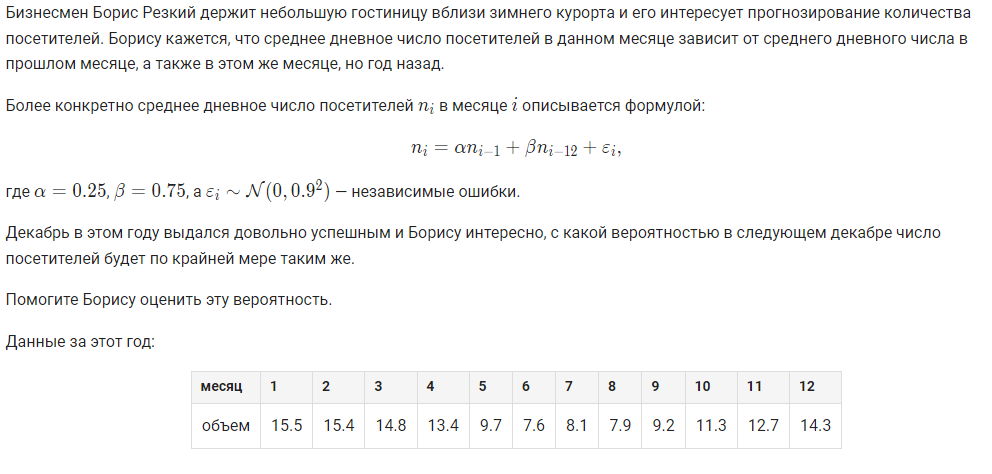

In [16]:
from scipy.stats import norm
from tqdm.notebook import tqdm

m_control = [15.5, 15.4, 14.8, 13.4, 9.7, 7.6, 8.1, 7.9, 9.2, 11.3, 12.7, 14.3]

c = 0
n = 100000
for _ in tqdm(range(n)):
    m = m_control.copy()
    e = norm(scale=0.9).rvs(size=12)
    for i in range(12):
        m[i] = 0.25 * m[i-1] + 0.75 * m[i] + e[i]
    if m[-1] >= m_control[-1]: c += 1
print(c/n)

  0%|          | 0/100000 [00:00<?, ?it/s]

0.28571


### Problem 4 ###
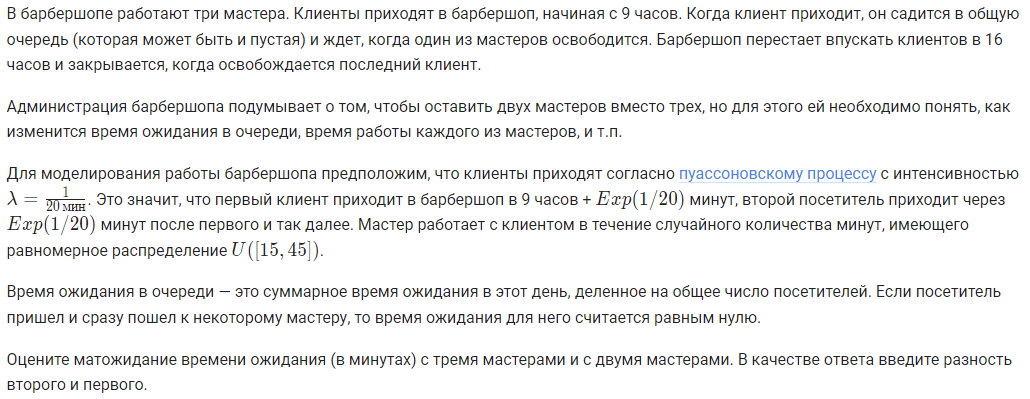

In [17]:
import scipy
import numpy as np
#working_minutes = (16 - 9) * 60 = 420

class Client():
    def __init__(self, vizit_time=0, wait_time=0):
        self.vizit_time = vizit_time # минута рабочего дня, на которой клиент пришел
        self.wait_time = wait_time # сколько минут клиент ждал
    def __add__(self, other): # служебный метод для вычисления среднего
        return Client(0, self.wait_time + other.wait_time)
    def __truediv__(self, other): # служебный метод для вычисления среднего
        return self.wait_time / other
    def __repr__(self):
        return ("client vt: " + str(self.vizit_time) + " wt: " + str(self.wait_time))

class Barber():
    def __init__(self, free_time=0):
        self.free_time = free_time # минута, на которой барбер освобождается
    def cut(self, client): # метод, рассчитывающий время ожидания клиента до стрижки и минуты, когда текущий бербер освободится
        client.wait_time = current_time - client.vizit_time
        t = np.random.randint(15, 46)
        self.free_time = current_time + t + 1
        #print(f'client came at {client.vizit_time}, waited for {client.wait_time}, cut at {current_time},  cut for {t} minutes')
        return client
    def __repr__(self):
        return f"barber ft: {self.free_time}"


means = []
for _ in range(10000):
    barbers = [Barber() for _ in range(2)]
    clients = []
    m = 0
    while True:
        m += round(scipy.stats.expon.rvs(scale=20))
        if m < 420:
            clients.append(Client(m))
        else: break

    cut_clients = []
    for current_time in range(420):
        for b in barbers:
            if clients and b.free_time <= current_time and clients[0].vizit_time <= current_time:
                cut_clients.append(b.cut(clients.pop(0)))

    means.append(np.mean(cut_clients))
two_barbers_wt = np.mean(means)

means = []
for _ in range(10000):
    barbers = [Barber() for _ in range(3)]
    clients = []
    m = 0
    while True:
        m += round(scipy.stats.expon.rvs(scale=20))
        if m < 420:
            clients.append(Client(m))
        else: break


    cut_clients = []
    for current_time in range(420): #min(clients).vizit_time
        for b in barbers:
            if clients and b.free_time <= current_time and clients[0].vizit_time <= current_time:
                cut_clients.append(b.cut(clients.pop(0)))

    means.append(np.mean(cut_clients))
three_barbers_wt = np.mean(means)

print(two_barbers_wt - three_barbers_wt)

10.974374439723276
